In [ ]:
## Kütüphaneler

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import tree


warnings.filterwarnings("ignore")

## Veri İndirme Ve Ekleme

In [2]:
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy().reshape((-1, 28, 28))

In [3]:
num_random_images = 10000
random_images = np.random.randint(0, 256, size=(num_random_images, 28, 28))

combined_images = np.concatenate([images, random_images])
combined_labels = np.concatenate([mnist.target.astype(int), np.full(num_random_images, -1)])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(combined_images, combined_labels, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print("Training dataset size:", X_train.shape)
print("Training labels size:", y_train.shape)
print("Test dataset size:", X_test.shape)
print("Test labels size:", y_test.shape)

Training dataset size: (64000, 784)
Training labels size: (64000,)
Test dataset size: (16000, 784)
Test labels size: (16000,)


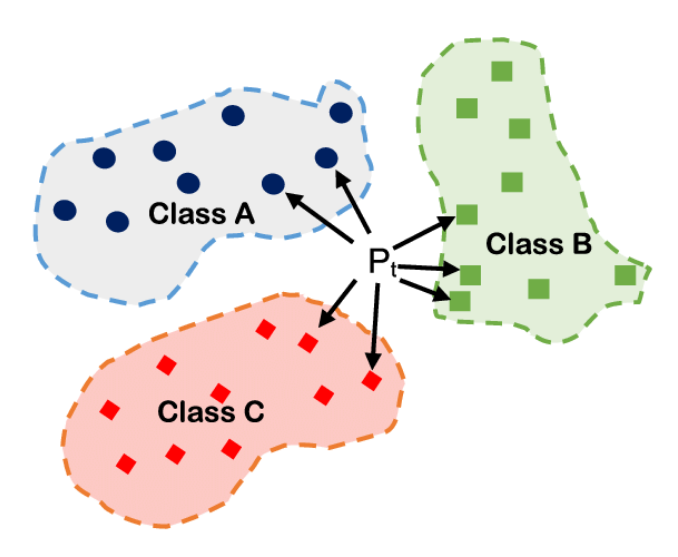

#### KNN (K-Nearest Neighbors) algoritması, en basit anlamıyla, tahmin edilecek değerin bağımsız değişkenlerinin oluşturduğu vektörün en yakın komşularının hangi sınıfa yoğun olduğu bilgisi üzerinden sınıfını tahmin etmeye dayanır.

#### KNN algoritması iki temel değer üzerinden tahmin yapar:

#### K (komşu sayısı): En yakın kaç komşu üzerinden hesaplama yapılacağını belirtir. K değeri sonucu doğrudan etkiler. K değeri 1 olduğunda, aşırı uyuma (overfitting) olasılığı çok yüksektir. Çok büyük bir K değeri ise çok genel sonuçlar elde edilmesine yol açar. Bu nedenle, optimum K değerini belirlemek, problem bağlamında önemli bir konudur.

#### Uzaklık (distance): Tahmin edilecek noktanın diğer noktalara olan uzaklığı hesaplanır. Bu hesaplama için Minkowski uzaklık hesaplama fonksiyonu kullanılır.

In [5]:
knn = KNeighborsClassifier(random_state = 21) 
knn.fit(X_train, y_train)  
y_pred = knn.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred)
print("KNN doğruluk skoru:", accuracy)

KNN doğruluk skoru: 0.9745


## SCV RBF

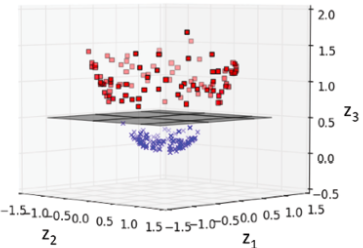

#### SVC RBF algoritması, veri noktalarını sınıflandırmak için bir karar sınırı oluşturur. Ancak, diğer SVC türlerinden farklı olarak, RBF çekirdek fonksiyonunu kullanır. Bu çekirdek fonksiyonu, veri noktalarını yüksek boyutlu uzaylara projelendirmek ve ardından bu uzayda sınıflandırma yapmak için kullanılır.

In [6]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf",random_state = 21)
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)

print("SVC RBF doğruluk skoru:", accuracy)


SVC RBF doğruluk skoru: 0.9789375


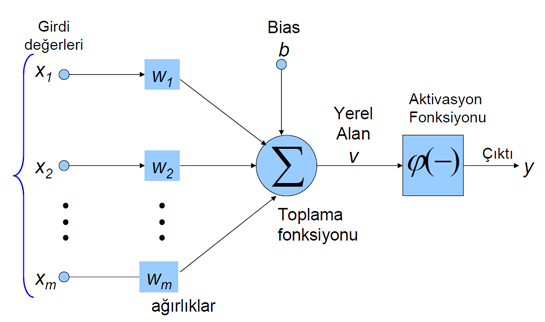

#### insan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarındandan birisidir
#### Bu algoritma, sınıflandırma ve regresyon problemleri için kullanılabilir. Sınıflandırma problemlerinde, veriler farklı kategorilere ayrılır ve bir veri noktasının hangi kategoriye ait olduğunu belirlemek için kullanılır. Regresyon problemlerinde ise, verilerin arasındaki ilişkiyi modellemek ve bir değişkenin değerini tahmin etmek için kullanılır.

In [7]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(random_state = 21).fit(X_train, y_train)
y_pred = mlpc.predict(X_test)
print("skor: "+str(accuracy_score(y_test,y_pred)))

skor: 0.9695


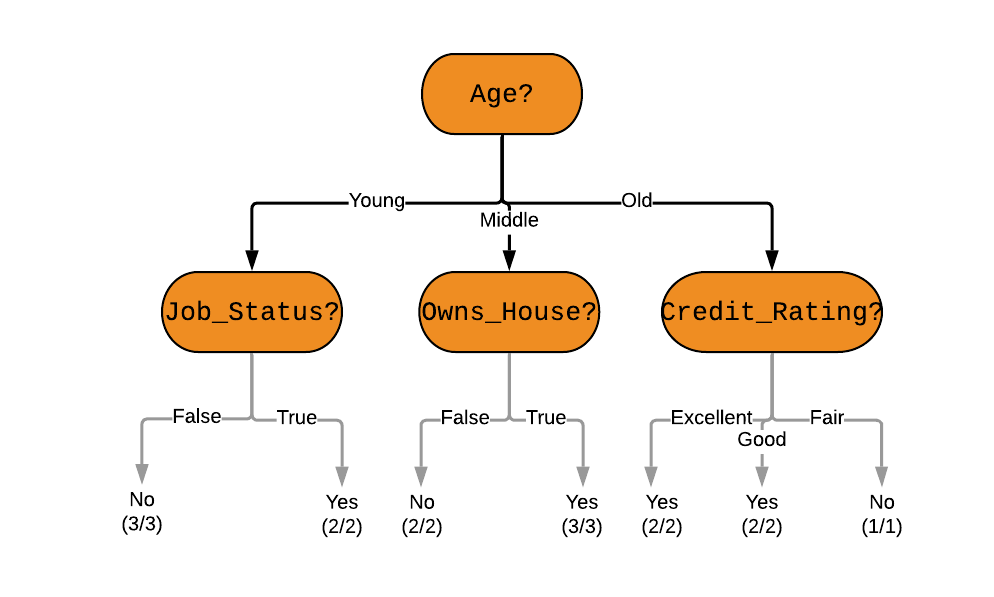

#### Bu algoritmanın temel amacı, veri setindeki karmaşık yapıları basit karar yapılarına dönüştürmektir. Yani, veri setindeki karmaşık ilişkileri anlamak ve bu ilişkileri daha anlaşılır ve yalın bir şekilde ifade etmek için kullanılır.
#### Özellikle heterojen veri setleri üzerinde etkili olan bu algoritma, belirlenmiş bir hedef değişkene göre homojen alt gruplara ayırma işlemi gerçekleştirir. Yani, veri setindeki farklı değişkenler arasındaki ilişkileri ve etkileşimleri belirleyerek, bu bilgiyi kullanarak veri setini daha küçük ve daha anlamlı parçalara böler.

In [8]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier(random_state = 21)
cart.fit(X_train,y_train)
y_pred = cart.predict(X_test)
print("skor: "+str(accuracy_score(y_test,y_pred)))

skor: 0.8891875


## Tüm Modellerin Karşılaştırılması

KNeighborsClassifier: Accuracy: 97.4500%
SVC: Accuracy: 97.8937%
MLPClassifier: Accuracy: 96.9500%
DecisionTreeClassifier: Accuracy: 88.9188%


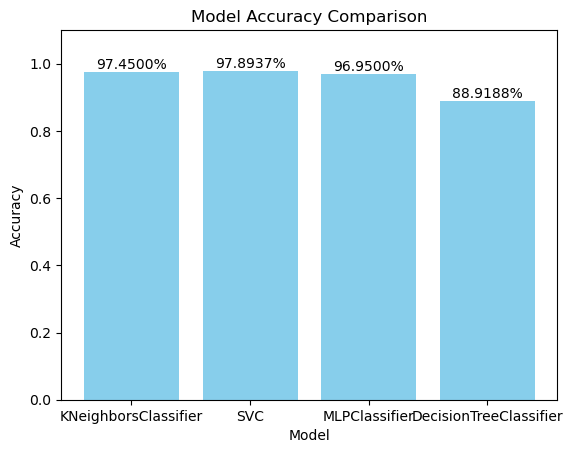

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

modeller = [knn,svc,mlpc,cart]

model_names = []
accuracies = []

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    model_names.append(isimler)
    accuracies.append(dogruluk)
    print(f"{isimler}: Accuracy: {dogruluk:.4%}")

plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.1)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4%}", ha='center')

plt.savefig('model_accuracy_comparison.png', format='png', dpi=300)  
plt.show()
